# Failure Case 1

In failure case 1, the bandit environment is a $d = 1$ linear bandit

The true context and the predicted context are sampled in the following way:

$$
    X_t \sim \text{Uniform}(\{-1, 0\})
$$

On $X_t = 0$, 
$$
    \tilde{X}_t \sim X_t + \epsilon_t
$$
where $P(\epsilon_t = -2) = 1/3$ and  $P(\epsilon_t = 1) = 2/3$.

On $X_t = -1$,
$$
    \tilde{X}_t \sim X_t + \epsilon_t
$$
where $P(\epsilon_t = -1) = 2/3$ and  $P(\epsilon_t = 2) = 1/3$.

The parameter $\theta_0^* = 3$ and $\theta_1^* = 1$.


In [8]:
import importlib
import visualization
importlib.reload(visualization)
from visualization import *

Namespace(T=5000, p0=0.1, env='failure1', d=1, sigma_eta=0, sigma_e=2.0, n_action=2, n_rep=100, seed=42, save_path='./runs/', sigma_s=0.5, theta=array([[3, 1]]))


In [9]:
with open('./runs/history_dict_failure1.pkl', 'rb') as f:
    history_dict, args = pickle.load(f)

## Plot of Theta Estimates

In the failure case 1, both UCB and TS converge with probability 1 to some $\theta_0 = \theta_1$, while MEB converges to the true parameters $\theta_0^* = 3$ and $\theta_1^* = 1$.

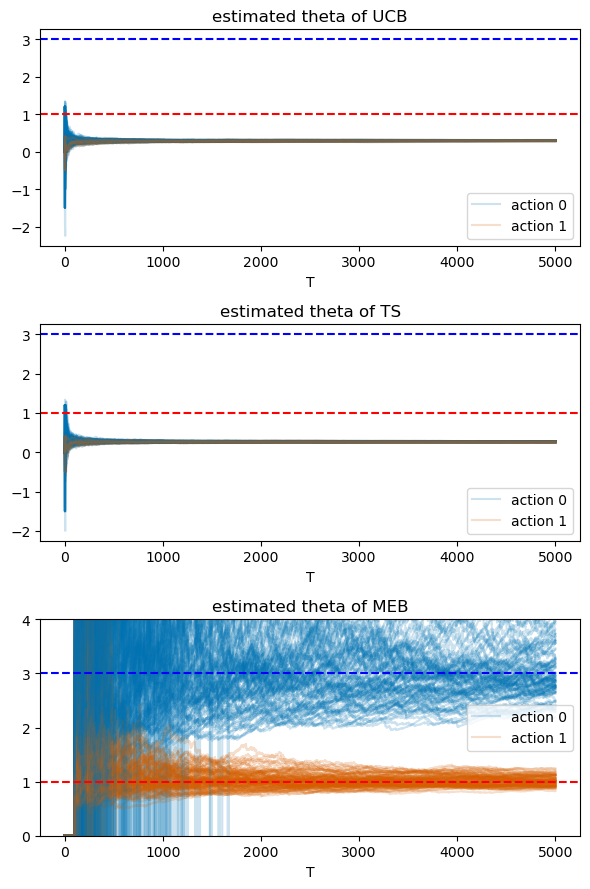

In [10]:
plot_theta_est(history_dict, args, diff=False)

In the plot below, we draw estimated $\theta_0 - \theta_1$.

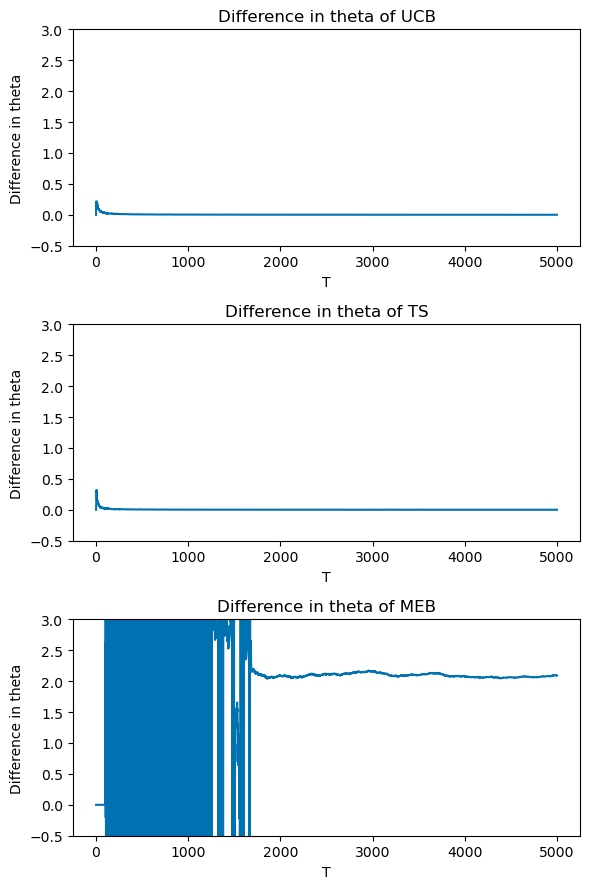

In [11]:
plot_theta_est(history_dict, args, diff=True)

Because UCB and TS converge to the same $\theta_0 = \theta_1$, the behavior of the two algorithms does not converge. It keeps switching between $0.9$ and $0.1$, while the behavior policy of MEB converges to the optimal one.

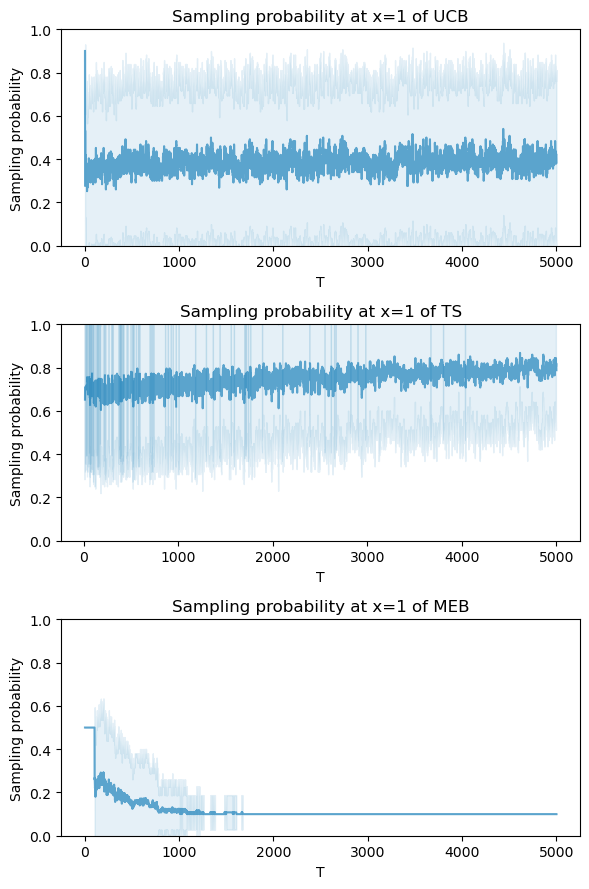

In [12]:
plot_pi_list(history_dict, args)

## Plot of Weighted Estimators

We demonstrate the density plots of weighted estimators. Here in green lines, we plot the density of Gaussian distribution with mean being the true parameter $\theta_0^* = 3$ and $\theta_1^* = 1$, and variance being the estimated variance. 

To estimate the variance, we need the converged behavior policy. For all three algorithms, we use the policy based on the last step theta estimates (we take average over independent runs).

We observe that the asymptotic variance estimates are significantly smaller than the true variance for UCB and TS, while it remains unbiased for MEB.

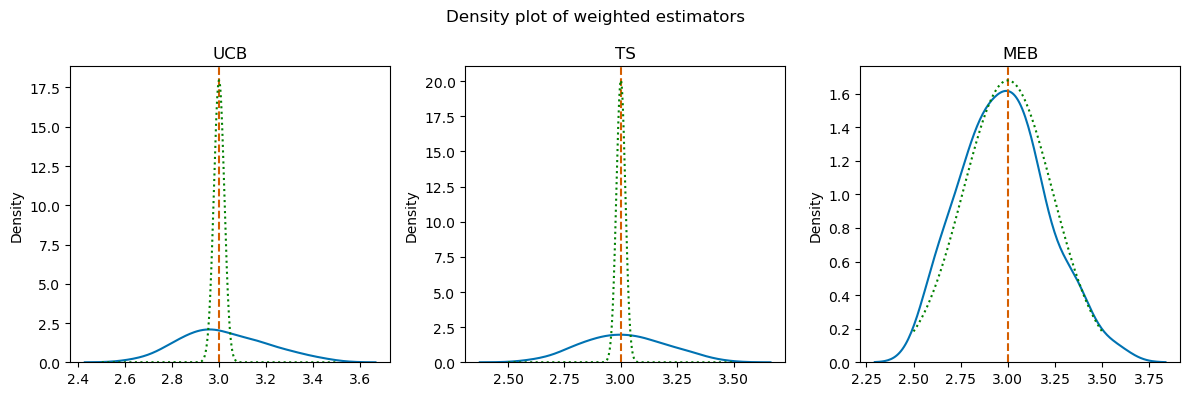

In [13]:
plot_batch_est(history_dict, args, draw_a = 0)

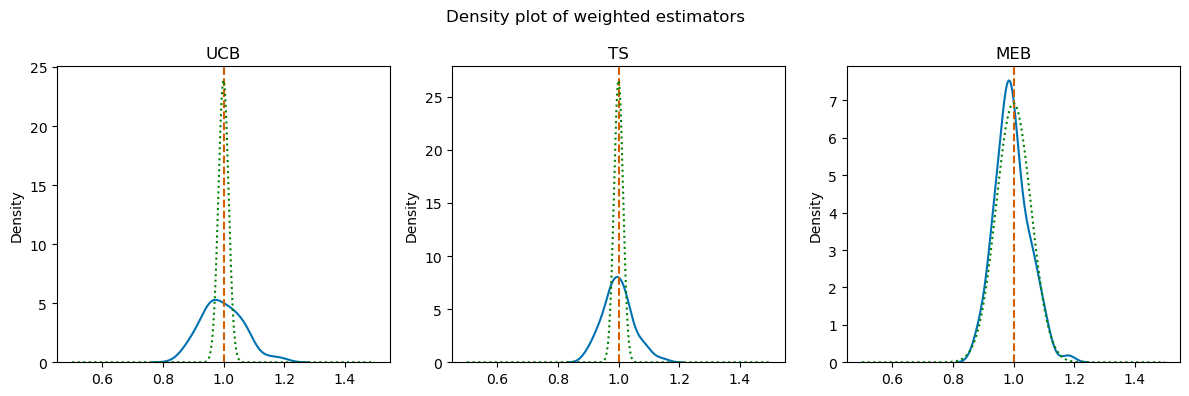

In [14]:
plot_batch_est(history_dict, args, draw_a = 1)

We also plot the naive variance estimates. The naive estimates are biased for all three algorithms.

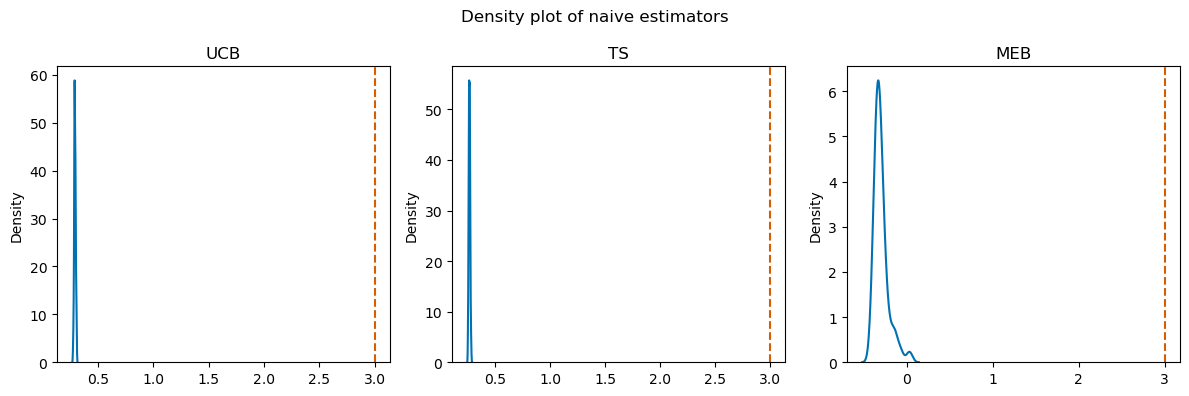

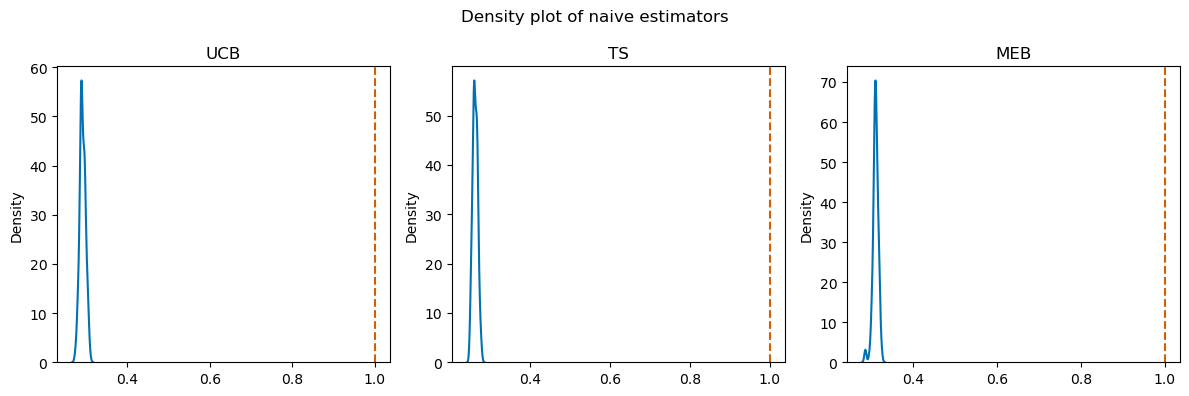

In [16]:
plot_naive_est(history_dict, args, draw_a = 0)
plot_naive_est(history_dict, args, draw_a = 1)